# Titanic Dataset Exploration

In [629]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score



In [630]:
df = pd.read_csv('titanic-passengersss.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [631]:
df.head().isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [633]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [634]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [635]:
df.isnull().sum().sum() 

866

### Here I decided to drop the column 'Cabin' because it had too many nulls

In [636]:
df.drop( ["Cabin"],axis=1 , inplace = True)

### Filling the column 'Age' with the mean of all its values

In [637]:
df["Age"].fillna(df["Age"].mean(), inplace= True)
print(df["Age"])

0      28.000000
1      25.000000
2      20.000000
3      29.000000
4      31.000000
         ...    
886    14.000000
887    22.000000
888    30.000000
889    29.699118
890    19.000000
Name: Age, Length: 891, dtype: float64


In [638]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64

### Dropping all the nulls in the rows of column 'Embarked'

In [639]:
df.dropna(axis = 0,subset=['Embarked'],how='any', inplace= True)

In [640]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Survived is 1 and didn't survive is 0

In [641]:
encoder= LabelEncoder()
df['Survived'] = encoder.fit_transform(df["Survived"]) 

### Females = 0 and Males = 1

In [642]:
df['Sex'] = encoder.fit_transform(df["Sex"])

### Specifying that C=0, S=1, otherwise=2

In [643]:
df['Embarked']= np.where(df['Embarked']=='C',0,np.where(df['Embarked']=='S',1,2))

### Dropping the rows based on logical feature selection

In [644]:
df.drop( ["Ticket"],axis=1 , inplace = True)

In [645]:
df.drop( ["PassengerId"],axis=1 , inplace = True)

### Converting these columns to integer form to have more accurate results and sorted visualizations

In [646]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int32 
 1   Pclass    889 non-null    int64 
 2   Name      889 non-null    object
 3   Sex       889 non-null    int32 
 4   Age       889 non-null    int32 
 5   SibSp     889 non-null    int64 
 6   Parch     889 non-null    int64 
 7   Fare      889 non-null    int32 
 8   Embarked  889 non-null    int32 
dtypes: int32(5), int64(3), object(1)
memory usage: 52.1+ KB


### Understanding the count of women and men who survived and who didn't

Percentage of women who survived: 0.7403846153846154
Percentage of men who survived: 0.18890814558058924


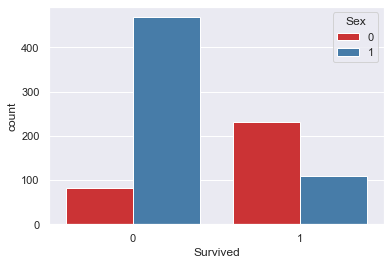

In [682]:
sns.countplot(x = 'Survived',hue = 'Sex', palette= "Set1", data = df)
women = df.loc[df.Sex == 0]["Survived"]
print("Percentage of women who survived:", sum(women)/len(women))
men = df.loc[df.Sex == 1]["Survived"]
print("Percentage of men who survived:", sum(men)/len(men))

### Visualizing the density of all ages on the ship

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


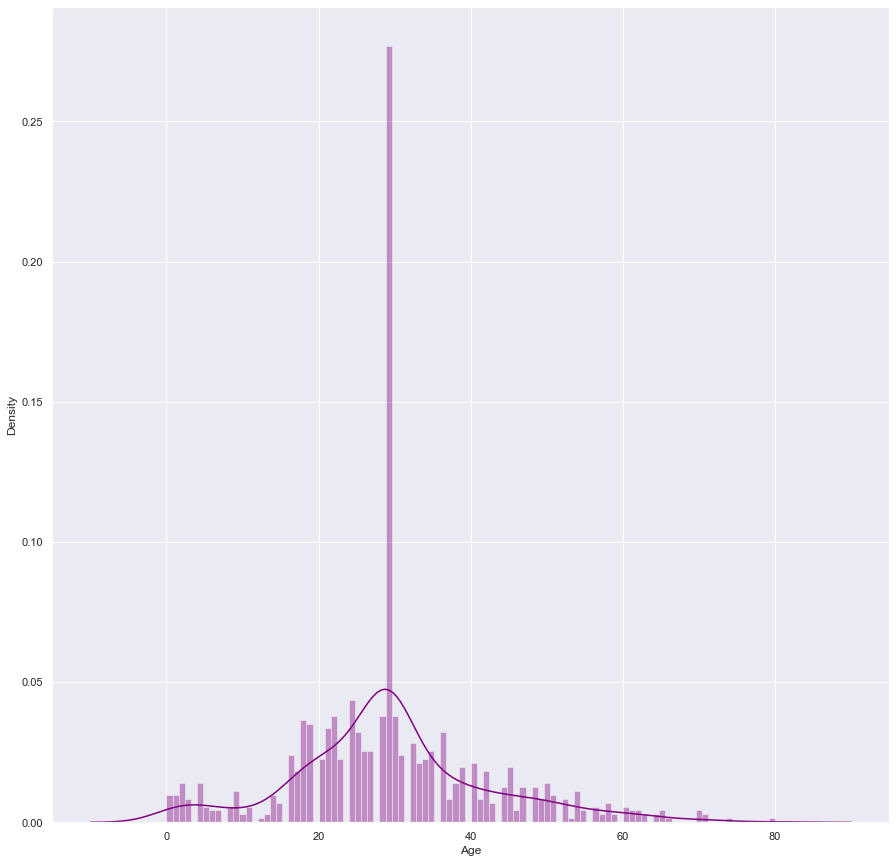

In [681]:
sns.distplot(df['Age'], bins = 100, color='Purple')
fig = plt.gcf()
fig.set_size_inches(15, 15)

### Showing the statistical count/correlation of all men and women with differing ages who survived and didn't

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

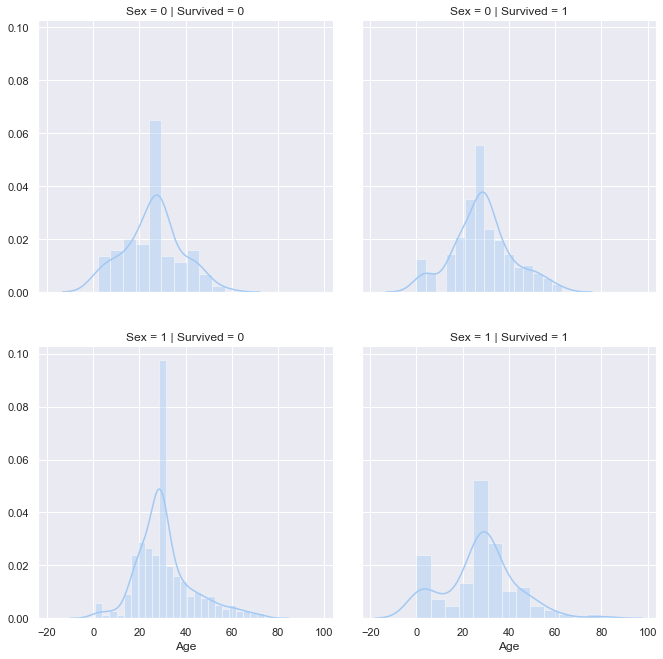

In [680]:
sns.FacetGrid(df, col = 'Survived', row = 'Sex').map(sns.distplot, 'Age')
fig = plt.gcf()
fig.set_size_inches(10, 10)

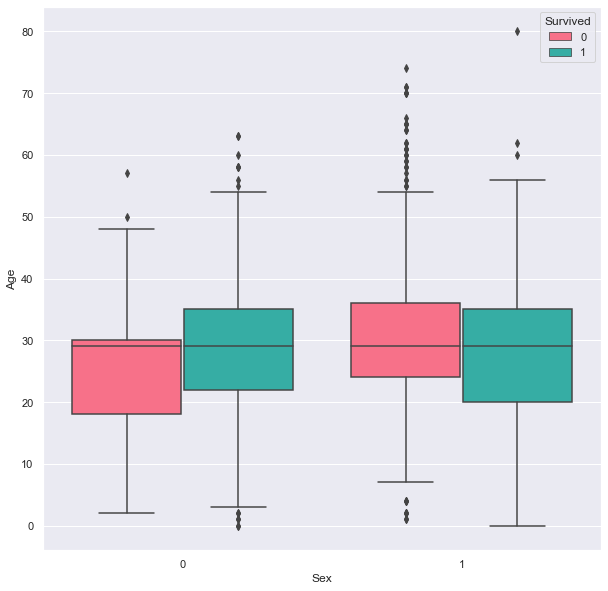

In [679]:
sns.boxplot(x='Sex', y= 'Age',hue= 'Survived', palette="husl", data= df, saturation=1)
fig = plt.gcf()
fig.set_size_inches(10, 10)


### Showing correlation between columns 'Survived' and 'Fare' based on the 'Pclass'

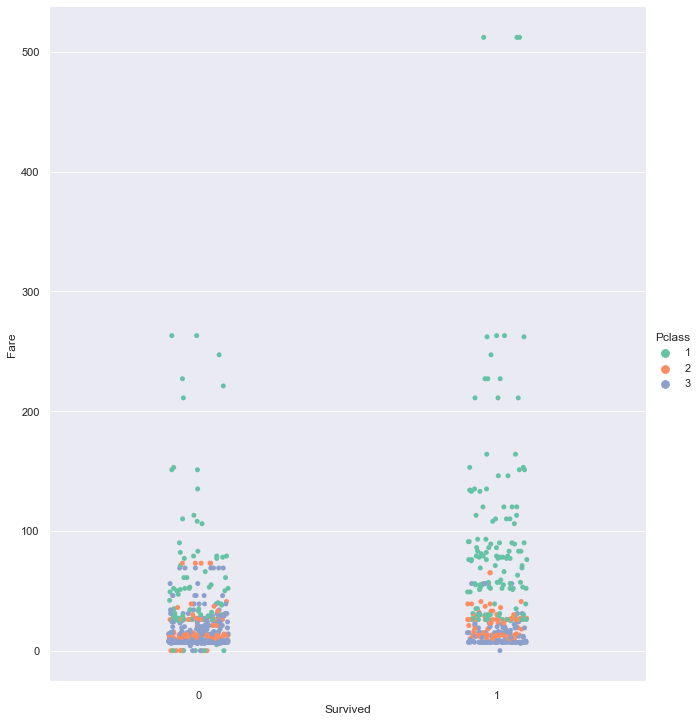

In [678]:
sns.catplot(x="Survived", y="Fare", hue= 'Pclass', data=df, kind="strip", palette= 'Set2',height=10, aspect=.9);

### The figure below is a heatmap that shows correlation between all columns together as well as the target to define the most important features in the dataset and ones that affected the survival.
0 = no correlation, 1 = perfect correlation , from 0.1 to 0.3 is weak, 0.4 to 0.6 is moderate, 0.7 to 0.9 is strong, it can be +ve or -ve, meaning inverse or direct relationship.
By studying this heatmap, we can conclude that the features that might have affected the survival rate the most are Fare, Pclass, and Sex -noting that Pclass and Sex have a negative correlation- and features that might have affected the survival rate the least are Parch, SibSp, and Age* -noting that SibSp and Age have a negative correlation- 


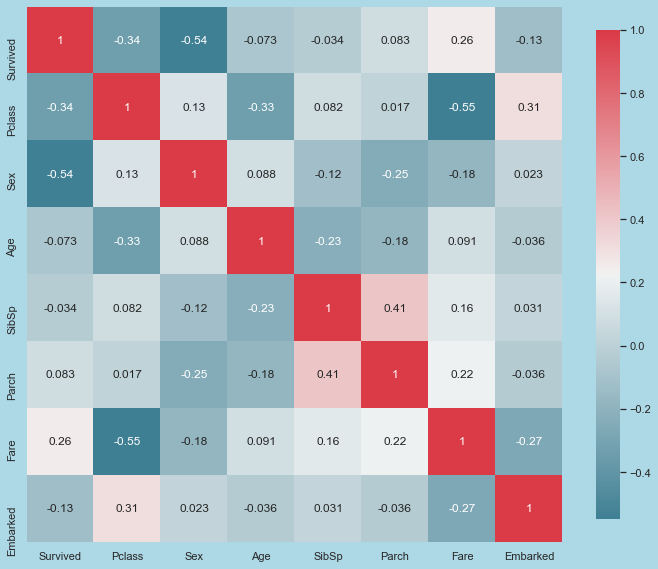

In [653]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [654]:
df[["Pclass", "Survived"]].groupby(["Survived"], as_index=True).mean()

,Pclass
Survived,
0,2.531876
1,1.955882


In [655]:
v= df['Name']
Sp1= df['Title'] = v.str.split(', ', expand = True)[1]

In [656]:
print(df['Title'])

0                                        Mr. Erik Gustaf
1                                      Mr. Sigurd Hansen
2                                         Mr. Hans Peder
3                     Mrs. Nils (Alma Cornelia Berglund)
4                                           Mr. Thornton
                             ...                        
886                          Mrs. Nicholas (Adele Achem)
887                                            Mr. Orsen
888                                         Miss. Marija
889                              Mr. Pastcho ("Pentcho")
890    Miss. Kate Florence ("Mrs Kate Louise Phillips...
Name: Title, Length: 889, dtype: object


In [657]:
Sp2= df['Title'] = Sp1.str.split('.', expand = True)[0]

In [658]:
print(Sp2)

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: 0, Length: 889, dtype: object


### Now that I constructed the column 'Title', there is no need for column 'Name'

In [659]:
df.drop( ["Name"],axis=1 , inplace = True)

In [660]:
print(df)

     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked Title
0           0       2    1   28      0      0    13         1    Mr
1           0       3    1   25      0      0     7         1    Mr
2           0       3    1   20      0      0     7         1    Mr
3           0       3    0   29      0      4    21         1   Mrs
4           0       1    1   31      1      0    52         1    Mr
..        ...     ...  ...  ...    ...    ...   ...       ...   ...
886         1       2    0   14      1      0    30         0   Mrs
887         0       3    1   22      0      0     7         0    Mr
888         0       3    0   30      0      0     8         1  Miss
889         0       3    1   29      0      0     7         1    Mr
890         1       2    0   19      0      0    26         1  Miss

[889 rows x 9 columns]


### Showing results before adding dictionary

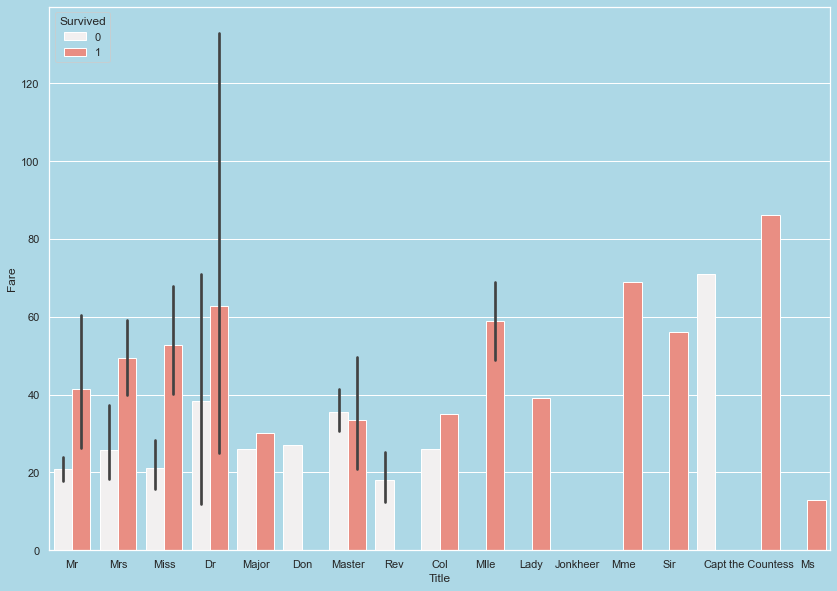

In [661]:
sns.barplot(x= "Title", y="Fare", data= df, hue= "Survived", color= 'Salmon')
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
fig = plt.gcf()
fig.set_size_inches(14, 10)

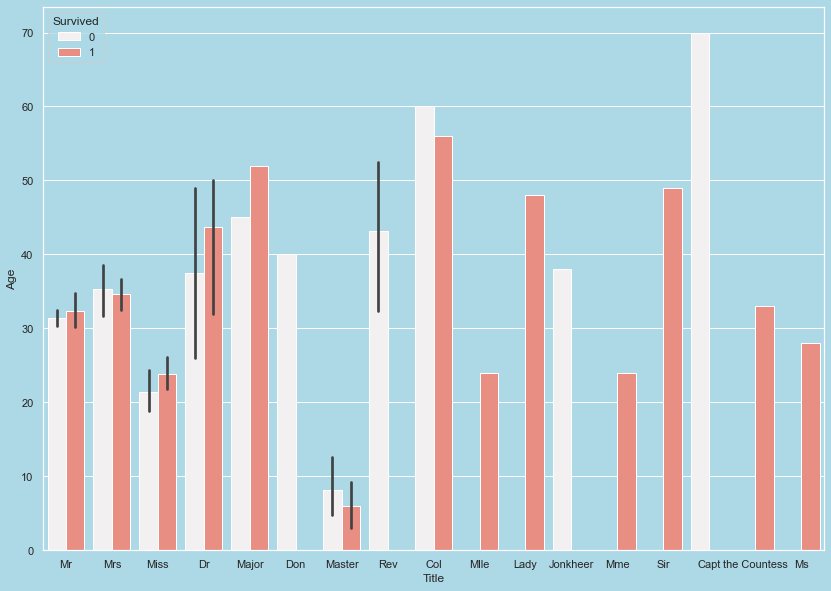

In [662]:
sns.barplot(x= "Title", y="Age", data= df, hue= "Survived", color= 'Salmon')
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
fig = plt.gcf()
fig.set_size_inches(14, 10)

In [663]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [664]:
df['Title'].replace(Title_Dictionary, inplace = True)

In [665]:
print(df['Title'])

0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: Title, Length: 889, dtype: object


### Showing results after adding dictionary

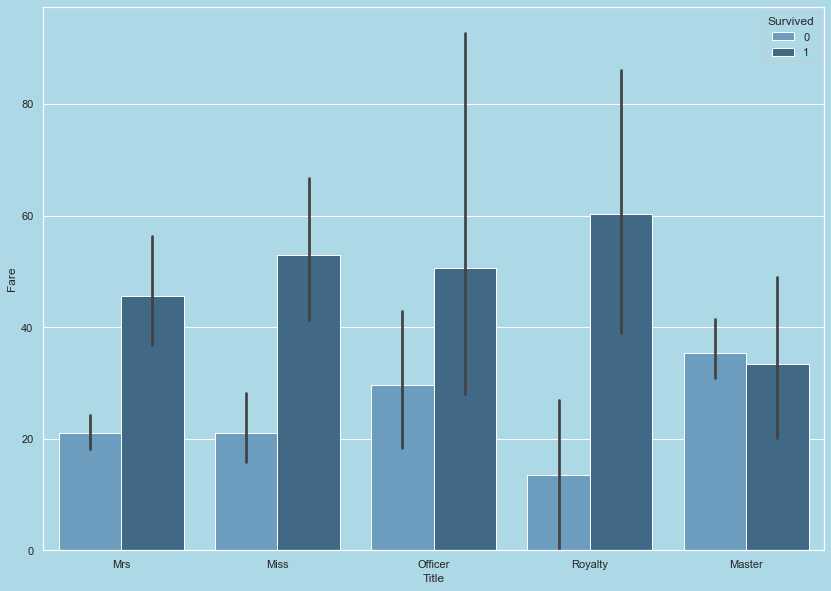

In [666]:
sns.barplot(x= "Title", y="Fare", data= df, hue= "Survived", palette="Blues_d")
fig = plt.gcf()
fig.set_size_inches(14, 10)

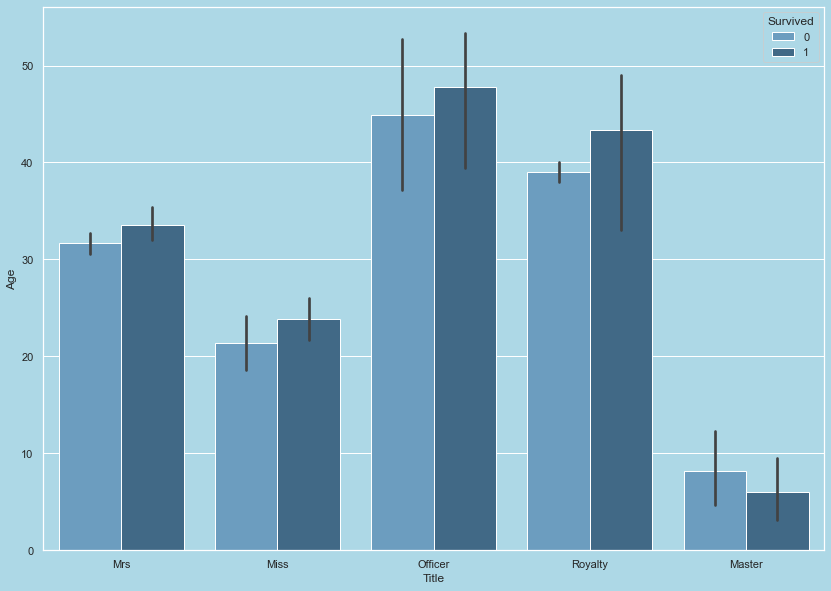

In [667]:
sns.barplot(x= "Title", y="Age", data= df, hue= "Survived",palette="Blues_d")
fig = plt.gcf()
fig.set_size_inches(14, 10)

In [668]:
df['FamilySize'] = df['Parch'] + df['SibSp']

### The column 'FamilySize' shows the the number of relatives that were on the titanic ship in total, which made sense of the column 'Parch' and 'Sibsp' combined much more.

In [669]:
print(df['FamilySize'])

0      0
1      0
2      0
3      4
4      1
      ..
886    1
887    0
888    0
889    0
890    0
Name: FamilySize, Length: 889, dtype: int64


### Passengers had a high probabilty of survival with 1 to 3 relatives, but a lower chance if less than 1 or more than 3, and gets even lower if more than 6

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


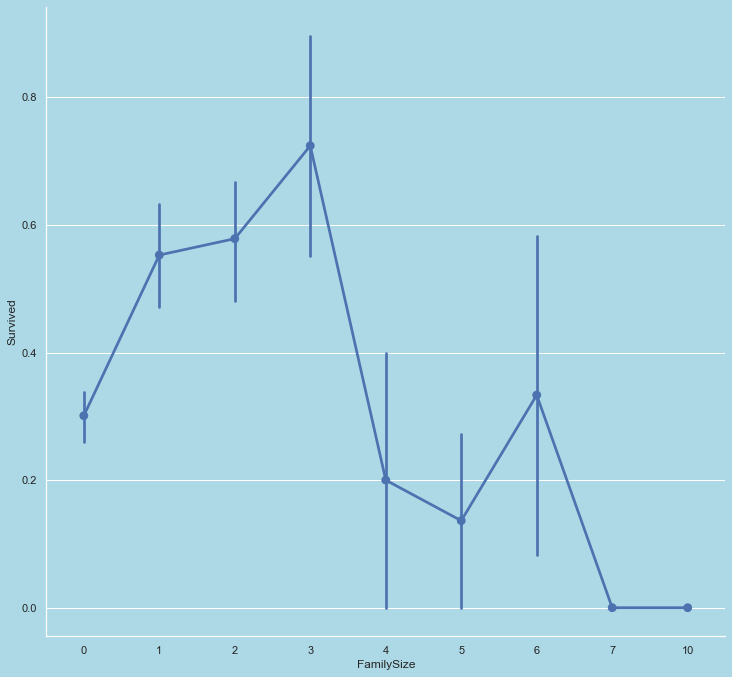

In [670]:
sns.factorplot('FamilySize','Survived', data=df, aspect = 2.5,)
sns.set_style('darkgrid')
sns.set_palette('pastel')
fig = plt.gcf()
fig.set_size_inches(10, 10)

### Defining the highest correlated features(x) with the target variable 'Survived' (y)

In [671]:
x=df[['Pclass', 'Fare', 'Age']]
y=df['Survived']

### Splitting dataset to 70% training and 30% testing 

In [672]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

### Applying Logistic Regression Algorithm and printing its accuracy

In [673]:
logistic= LogisticRegression()  
logistic.fit(x_train, y_train)  
prediction  = logistic.predict(x_test)  
print("Logistic Regression accuracy is " + str(round((logistic.score(x_test, y_test)),2)))

Logistic Regression accuracy is 0.72


### Visualizing confusion matrix to show the results of TP/TN/FP/FN

In [674]:
confusion_matrix = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,147,18
1,58,44



#### 147 persons were predicted to survive and it was true.
#### 18 persons were predicted to survive and it was false.
#### 58 persons were predicted to not survive and it was false.
#### 44 persons were predicted to not survive and it was true.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

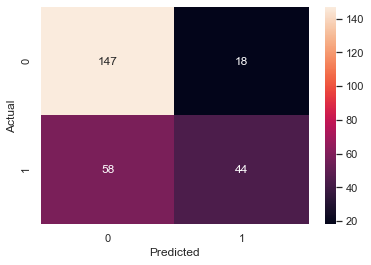

In [675]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

### Making calculations to:
1)show the accuracy of the model 

2)show the precision (it is the number of correct positive results divided by the number of positive results predicted by the classifier)

3)show the recall (measures the proportion of actual positive labels correctly identified by the model to number of actual positives, the TP)

4)show the error rate in model

5)show the specifity(opposing to recall, it is the proportion of actual negatives, which got predicted as negative, the TN)

In [676]:
Accuracy= accuracy_score(y_test, prediction)
Precision=precision_score(y_test, prediction)
Recall=recall_score(y_test, prediction)
Error=(1-accuracy_score(y_test,prediction))
Specificity=recall_score(y_test, prediction, pos_label=0)
print("Accuracy score: ", Accuracy)
print("Precision score: ",Precision) 
print("Recall Score: ",Recall) 
print("Error Rate: ",Error)
print('Specificity : ',Specificity)

Accuracy score:  0.7153558052434457
Precision score:  0.7096774193548387
Recall Score:  0.43137254901960786
Error Rate:  0.28464419475655434
Specificity :  0.8909090909090909


### ROC stands for Receiver Operating Characteristic curve. This is a graph that shows the performance of a machine learning model on a classification problem by plotting the true positive rate and the false positive rate. AUC stands for Area Under the Curve. It is used to measure the entire area under the ROC curve.Whenever the AUC equals 1 then it is the ideal situation for a machine learning model(the higher the better)


### In the next graph we show the AUC/ROC plot and show the TP and FP of our dataset to determine who survived and who didn't on the titanic

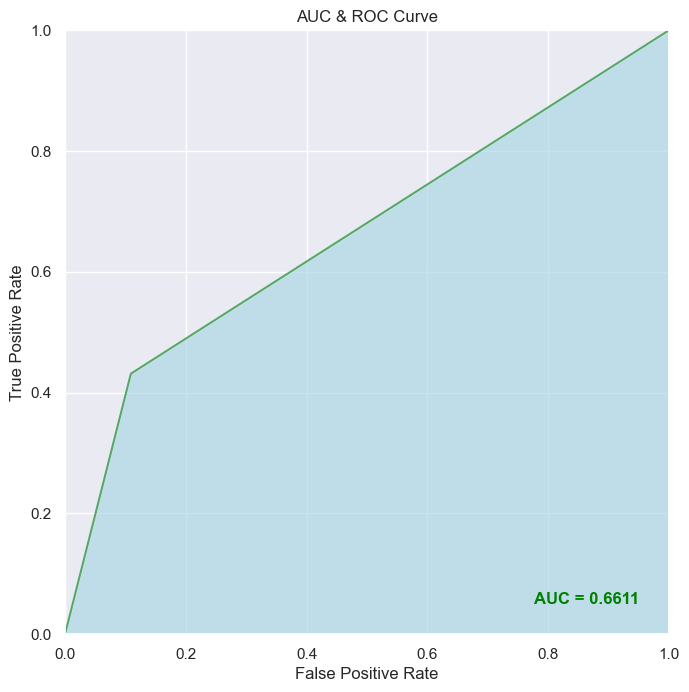

In [677]:
auc = metrics.roc_auc_score(y_test, prediction)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, prediction)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()